<a href="https://colab.research.google.com/github/Samraddhi-Gupta/cat-and-dog-classification/blob/main/cat_and_dog_claissification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install q kaggle

In [2]:
from google.colab import files
import pandas as pd
import numpy as np
from google.colab import autoviz
import seaborn as sns

In [3]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mgiitkd","key":"5966abc4ca0269eb415948447adbc8e3"}'}

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [5]:
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle datasets download -d sunilthite/cat-or-dog-image-classification

Dataset URL: https://www.kaggle.com/datasets/sunilthite/cat-or-dog-image-classification
License(s): other
100% 599M/599M [00:30<00:00, 21.0MB/s]
100% 599M/599M [00:30<00:00, 20.9MB/s]


In [7]:
import zipfile
zip_ref = zipfile.ZipFile('/content/cat-or-dog-image-classification.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [8]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [9]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/Train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/Test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 23650 files belonging to 2 classes.
Found 3863 files belonging to 2 classes.


In [10]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [11]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 254, 254, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 125, 125, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 60, 60, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [13]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [14]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
740/740 ━━━━━━━━━━━━━━━━━━━━ 82s 89ms/step - accuracy: 0.5682 - loss: 2.0981 - val_accuracy: 0.6422 - val_loss: 0.6043
Epoch 2/10
740/740 ━━━━━━━━━━━━━━━━━━━━ 60s 82ms/step - accuracy: 0.7041 - loss: 0.5597 - val_accuracy: 0.7033 - val_loss: 0.5807
Epoch 3/10
740/740 ━━━━━━━━━━━━━━━━━━━━ 78s 76ms/step - accuracy: 0.7771 - loss: 0.4728 - val_accuracy: 0.7269 - val_loss: 0.5888
Epoch 4/10
740/740 ━━━━━━━━━━━━━━━━━━━━ 82s 77ms/step - accuracy: 0.8085 - loss: 0.4175 - val_accuracy: 0.7181 - val_loss: 0.9504
Epoch 5/10
740/740 ━━━━━━━━━━━━━━━━━━━━ 81s 76ms/step - accuracy: 0.8406 - loss: 0.3647 - val_accuracy: 0.8385 - val_loss: 0.3922
Epoch 6/10
740/740 ━━━━━━━━━━━━━━━━━━━━ 56s 76ms/step - accuracy: 0.8835 - loss: 0.2739 - val_accuracy: 0.8447 - val_loss: 0.4547
Epoch 7/10
740/740 ━━━━━━━━━━━━━━━━━━━━ 82s 77ms/step - accuracy: 0.9227 - loss: 0.1918 - val_accuracy: 0.8649 - val_loss: 0.3550
Epoch 8/10
740/740 ━━━━━━━━━━━━━━━━━━━━ 57s 78ms/step - accuracy: 0.9511 - loss: 0.1289 - 

In [21]:
# Get the final training accuracy
final_train_accuracy = history.history['accuracy'][-1] * 100

# Get the final validation accuracy
final_val_accuracy = history.history['val_accuracy'][-1] * 100

# Print the accuracies
print(f"Final Training Accuracy: {final_train_accuracy:.2f}%")
print(f"Final Validation Accuracy: {final_val_accuracy:.2f}%")

Final Training Accuracy: 97.84%
Final Validation Accuracy: 85.63%


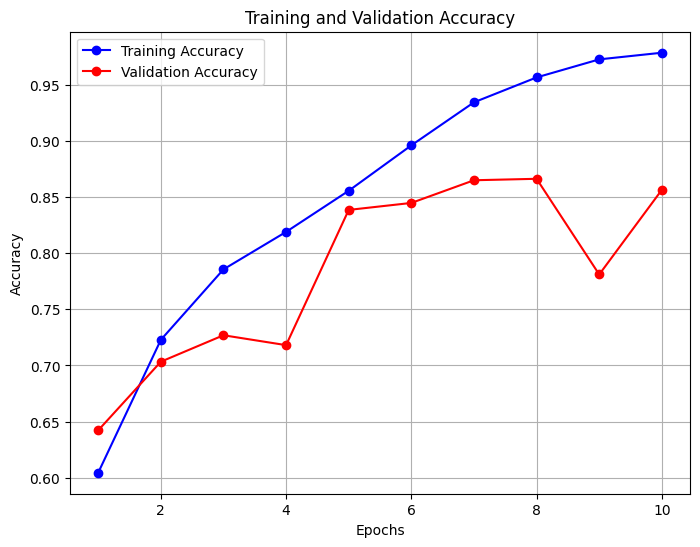

In [22]:
import matplotlib.pyplot as plt

# Accessing the history
history_dict = history.history

# Extracting accuracy and validation accuracy
accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

# Extracting the epochs
epochs = range(1, len(accuracy) + 1)

# Plotting the accuracy
plt.figure(figsize=(8, 6))
plt.plot(epochs, accuracy, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'ro-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

In [19]:
import cv2
test_img = cv2.imread('/content/cat.jpg')


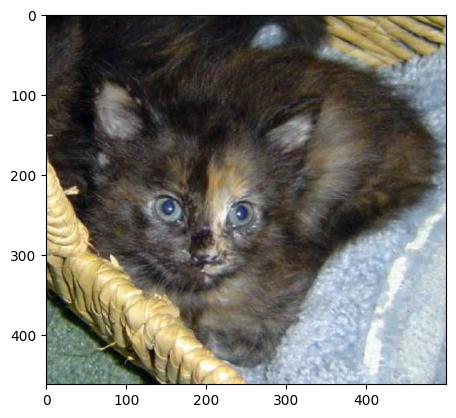

In [26]:
from PIL import Image
import numpy as np

test_img = Image.open('/content/Test/Cat/cat.10030.jpg')  # Replace with image path
test_img = np.array(test_img)  # Convert to NumPy array
plt.imshow(test_img)
plt.show()


In [27]:
test_img.shape

(462, 500, 3)

In [28]:
test_img = cv2.resize(test_img,(256,256))

In [29]:
test_input = test_img.reshape((1,256,256,3))

In [30]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 942ms/step


array([[1.6735685e-21]], dtype=float32)

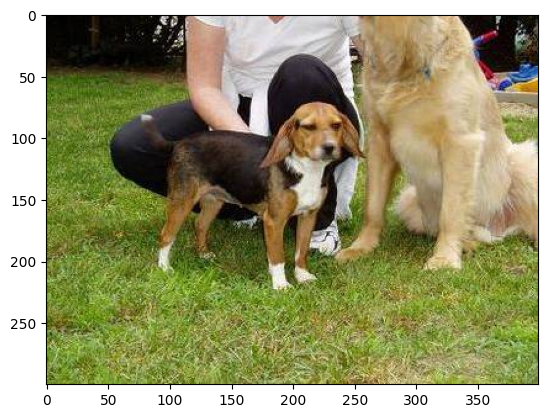

In [31]:
from PIL import Image
import numpy as np

test_img = Image.open('/content/Test/Dog/dog.4131.jpg')  # Replace with image path
test_img = np.array(test_img)  # Convert to NumPy array
plt.imshow(test_img)
plt.show()

In [32]:
test_img.shape

(300, 399, 3)

In [33]:
test_img = cv2.resize(test_img,(256,256))

In [34]:
test_input = test_img.reshape((1,256,256,3))

In [35]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


array([[1.]], dtype=float32)